# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [1]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 124.0 MB 10 kB/s  eta 0:00:01   |                                | 163 kB 516 kB/s eta 0:04:00     |████▉                           | 18.9 MB 734 kB/s eta 0:02:24     |█████                           | 19.0 MB 734 kB/s eta 0:02:23     |█████                           | 19.5 MB 734 kB/s eta 0:02:23     |█████▌                          | 21.3 MB 463 kB/s eta 0:03:42     |██████▏                         | 23.7 MB 482 kB/s eta 0:03:28     |██████▌                         | 25.2 MB 482 kB/s eta 0:03:26     |████████████▌                   | 48.3 MB 859 kB/s eta 0:01:29     |█████████████▎                  | 51.3 MB 2.7 MB/s eta 0:00:27     |██████████████████▋             | 72.2 MB 745 kB/s eta 0:01:10     |█████████████████████           | 81.3 MB 3.1 MB/s eta 0:00:14     |█████████████████████           | 81.8 MB 729 kB/s eta 0:00:58     |████████████████████████▏       | 93.8 MB 991 kB/s eta 0:00:31     |██████████████████████████      | 100.5 MB 5

In [107]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import glob
import re

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from PIL import Image

## osを使用する場合

In [66]:
!pwd

/Users/apple/diveintocode-ml


In [67]:
path = './training' 
flist = os.listdir(path)

In [68]:
!ls -a ./training

.          cat10.jpeg cat4.jpeg  cat7.jpeg  dog10.jpeg dog7.jpeg  dog_1.jpeg
..         cat2.jpeg  cat5.jpeg  cat8.jpeg  dog5.jpeg  dog8.jpeg  dog_2.jpeg
cat.jpeg   cat3.jpeg  cat6.jpeg  cat9.jpeg  dog6.jpeg  dog9.jpeg  dog_4.jpeg


In [69]:
flist

['cat.jpeg',
 'dog7.jpeg',
 'dog6.jpeg',
 'cat6.jpeg',
 'dog_1.jpeg',
 'cat7.jpeg',
 'cat4.jpeg',
 'cat10.jpeg',
 'cat8.jpeg',
 'dog10.jpeg',
 'dog_2.jpeg',
 'cat9.jpeg',
 'cat5.jpeg',
 'dog9.jpeg',
 'cat2.jpeg',
 'dog5.jpeg',
 'cat3.jpeg',
 'dog8.jpeg',
 'dog_4.jpeg']

In [70]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat.jpeg',
 'dog7.jpeg',
 'dog6.jpeg',
 'cat6.jpeg',
 'dog_1.jpeg',
 'cat7.jpeg',
 'cat4.jpeg',
 'cat10.jpeg',
 'cat8.jpeg',
 'dog10.jpeg',
 'dog_2.jpeg',
 'cat9.jpeg',
 'cat5.jpeg',
 'dog9.jpeg',
 'cat2.jpeg',
 'dog5.jpeg',
 'cat3.jpeg',
 'dog8.jpeg',
 'dog_4.jpeg']

## globを使用する場合

In [71]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [72]:
img_list 

['./training/cat.jpeg',
 './training/dog7.jpeg',
 './training/dog6.jpeg',
 './training/cat6.jpeg',
 './training/dog_1.jpeg',
 './training/cat7.jpeg',
 './training/cat4.jpeg',
 './training/cat10.jpeg',
 './training/cat8.jpeg',
 './training/dog10.jpeg',
 './training/dog_2.jpeg',
 './training/cat9.jpeg',
 './training/cat5.jpeg',
 './training/dog9.jpeg',
 './training/cat2.jpeg',
 './training/dog5.jpeg',
 './training/cat3.jpeg',
 './training/dog8.jpeg',
 './training/dog_4.jpeg']

# イメージのロード、配列化、リサイズ、データセット作成

In [73]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [74]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(9, 224, 224, 3)  cat_image:(10, 224, 224, 3)


# イメージの出力

In [75]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.90980392, 0.8       , 0.64313725],
        [0.90980392, 0.8       , 0.64313725],
        [0.90588235, 0.79607843, 0.63921569],
        ...,
        [0.88235294, 0.89803922, 0.90196078],
        [0.88235294, 0.89803922, 0.90196078],
        [0.88235294, 0.89803922, 0.90196078]],

       [[0.91764706, 0.80784314, 0.65098039],
        [0.91764706, 0.80784314, 0.65098039],
        [0.91372549, 0.80392157, 0.64705882],
        ...,
        [0.88235294, 0.89803922, 0.90196078],
        [0.88235294, 0.89803922, 0.90196078],
        [0.88235294, 0.89803922, 0.90196078]],

       [[0.93333333, 0.82745098, 0.65882353],
        [0.93333333, 0.82745098, 0.65882353],
        [0.92941176, 0.82352941, 0.65490196],
        ...,
        [0.88235294, 0.89803922, 0.90196078],
        [0.88235294, 0.89803922, 0.90196078],
        [0.88235294, 0.89803922, 0.90196078]],

       ...,

       [[0.88627451, 0.70196078, 0.49019608],
        [0.88235294, 0.69803922, 0.48627451],
        [0.8627451 , 0

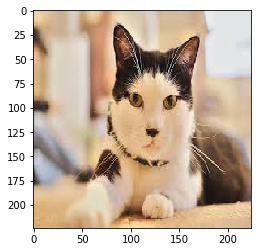

In [76]:
# 配列を画像として出力

plt.imshow(cat_img_array[3])

plt.show()

In [77]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


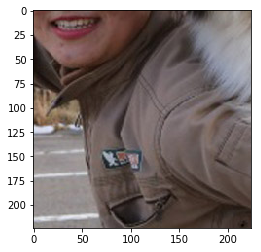

In [78]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

plt.show()

<class 'PIL.Image.Image'>


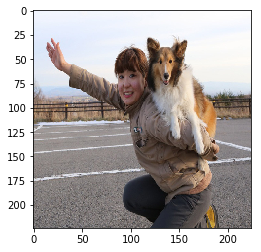

In [79]:
img = Image.open(img_list[4])

img_resize = img.resize((224,224))

print(type(img_resize))

plt.imshow(img_resize)

plt.show()

## Kerasでもやってみよう

In [80]:
from keras.preprocessing.image import load_img, img_to_array

In [81]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.94509804, 0.9529412 , 1.        ],
        [0.9490196 , 0.95686275, 1.        ],
        [0.9490196 , 0.9607843 , 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.9490196 , 0.95686275, 1.        ],
        [0.94509804, 0.9529412 , 1.        ],
        [0.9490196 , 0.9607843 , 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ]],

       [[0.9490196 , 0.9607843 , 0.99607843],
        [0.9490196 , 0.9607843 , 0.99607843],
        [0.9490196 , 0.9607843 , 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.49019608, 0.48235294, 0.4862745 ],
        [0.57254905, 0.5568628 , 0.56078434],
        [0.41568628, 0

<class 'PIL.Image.Image'>


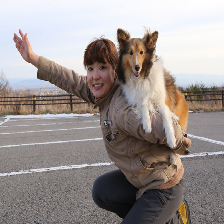

In [82]:
print(type(img_keras))

img_keras

# openCVの色形式

In [83]:
import cv2

## グレースケール 

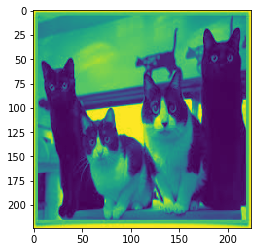

In [84]:
# 第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

plt.imshow(img)

plt.show()

## BGRとRGB

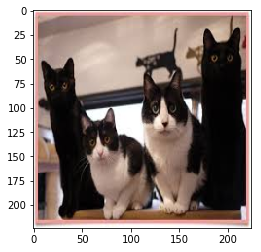

In [85]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

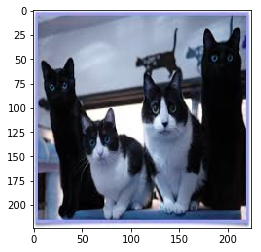

In [86]:
# BGRチャネル

plt.imshow(img)

plt.show()

## 【問題2】分類データセットに対するデータ拡張

In [87]:
for img in img_list:
    if re.search("dog" , img):
        dog = Image.open(img)
    if re.search("cat" , img):
        cat = Image.open(img)

In [88]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array

In [89]:
datagen = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

In [90]:
#入力ディレクトリを作成
input_dir = "cat.font"
files = glob.glob(input_dir + '/*.jpeg')
# 出力ディレクトリを作成
output_dir = "image_out"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

In [93]:
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
           rotation_range=45, #指定範囲でランダムに回転
           width_shift_range=0.1,#ランダムに水平シフト
           height_shift_range=0.1,#ランダムに垂直シフト
           shear_range=0.2,#シアー変換
           zoom_range=0.2,#ランダムにズーム
           channel_shift_range=5,#チャンネルをランダムに移動
           brightness_range=[0.3, 1.0],#画像の明るさ調整
           horizontal_flip=False,
           vertical_flip=False)
 
    # n_iter個の画像を生成します
    n_iter = 1
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpeg')
    for i in range(n_iter):
        batch = g.next()

In [94]:
path = "image_out"
flist = os.listdir(path)
len(flist)

0

In [95]:
flist_ignore = [name for name in os.listdir(path) if not name.startswith(".")]
len(flist_ignore)

0

In [97]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [98]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [99]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(0, 224, 224, 3)  cat_image:(0, 224, 224, 3)


In [100]:
X = np.concatenate([dog_img_array , cat_img_array] , axis=0)

In [101]:
y_list = []

for img in img_list:
    if re.search("dog" , img):
        label = 0
        y_list.append(label)
    if re.search("cat" , img):
        label = 1
        y_list.append(label)

In [102]:
y = y_list

In [103]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
               X , y , test_size = 0.2)

In [105]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Conv2D , MaxPooling2D , Flatten , Dropout
from keras.optimizers import Adam
from keras import layers
from keras import models
from keras import backend as K

In [108]:
K.clear_session()

input_data = tf.keras.layers.Input(shape=(224 , 224 , 3))
con_1 = tf.keras.layers.Conv2D(3 , kernel_size=(2,2) , activation=tf.nn.relu)(input_data)
max_p1 = tf.keras.layers.MaxPooling2D((3,3) , strides=(1,1))(con_1)
con_2 = tf.keras.layers.Conv2D(3 , kernel_size=(2,2) , activation=tf.nn.relu)(max_p1)
max_p2 = tf.keras.layers.MaxPooling2D((3,3) , strides=(1,1))(con_2)
fla = tf.keras.layers.Flatten()(max_p2)

x = tf.keras.layers.Dense(1024 , activation = tf.nn.relu)(fla)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512 , activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256 , activation = tf.nn.relu)(x)
output = tf.keras.layers.Dense(1 , activation = tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs = input_data , outputs = output)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [109]:
model.summary()
model.compile(loss="binary_crossentropy",
             optimizer = tf.train.AdamOptimizer(learning_rate=1e-4),
             metrics=["accuracy"])

histoty = model.fit(X_train , y_train , 
                   batch_size = 32 , 
                   epochs = 20 , 
                   verbose=1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 223, 223, 3)       39        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 221, 221, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 3)       39        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 218, 218, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 142572)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              145994

IndexError: list index out of range

【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images



In [110]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [111]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [112]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(10,40))
    plt.imshow(img)
    return img

In [113]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

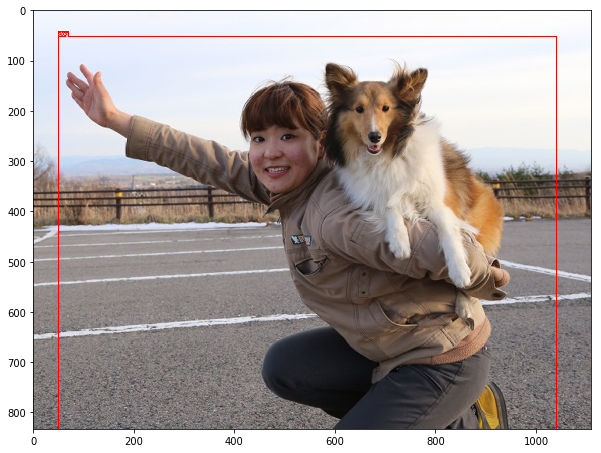

In [116]:
image = download_image('./training/dog_1.jpeg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[50,52,1041,1096]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./training/dog_1.jpeg")

【問題4】物体検出データセットに対するデータ拡張¶
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします

In [119]:
#入力ディレクトリを作成
input_dir = "./cats"
files = glob.glob(input_dir + '/*.jpg')
# 出力ディレクトリを作成
output_dir = "./image_out"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

In [120]:
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
           rotation_range=45, #指定範囲でランダムに回転
           width_shift_range=0.1,#ランダムに水平シフト
           height_shift_range=0.1,#ランダムに垂直シフト
           shear_range=0.2,#シアー変換
           zoom_range=0.2,#ランダムにズーム
           channel_shift_range=5,#チャンネルをランダムに移動
           brightness_range=[0.3, 1.0],#画像の明るさ調整
           horizontal_flip=False,
           vertical_flip=False)
 
    # n_iter個の画像を生成します
    n_iter = 5
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(n_iter):
        batch = g.next()

In [121]:
#入力ディレクトリを作成
input_dir = "./dogs"
files = glob.glob(input_dir + '/*.jpg')
# 出力ディレクトリを作成
output_dir = "./image_out"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

In [122]:
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
           rotation_range=45, #指定範囲でランダムに回転
           width_shift_range=0.1,#ランダムに水平シフト
           height_shift_range=0.1,#ランダムに垂直シフト
           shear_range=0.2,#シアー変換
           zoom_range=0.2,#ランダムにズーム
           channel_shift_range=5,#チャンネルをランダムに移動
           brightness_range=[0.3, 1.0],#画像の明るさ調整
           horizontal_flip=False,
           vertical_flip=False)
 
    # n_iter個の画像を生成します
    n_iter = 5
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(n_iter):
        batch = g.next()